In [17]:
# !pip install seaborn

In [16]:
import math
import scipy.stats as st
import pandas as pd
import numpy as np

#### Chi-square goodness of fit

### 10.29

In [18]:
prop_vals = [0.8, 0.1, 0.05, 0.03, 0.02]

x1 = 238
x2 = 32
x3 = 12
x4 = 13
x5 = 5

defect_vals = [x1, x2, x3, x4, x5]
# print(defect_vals)

all_defects = sum(defect_vals)

expected = []
for prop in prop_vals:
    expected.append(prop * all_defects)

d = {'pop_prop': prop_vals, 'observed': defect_vals, 'expected': expected}
# d

In [19]:
df = pd.DataFrame(d)
df

,pop_prop,observed,expected
0,0.80,238,240.0
1,0.10,32,30.0
2,0.05,12,15.0
3,0.03,13,9.0
4,0.02,5,6.0


In [20]:
chi_sq_calc = sum( ( (df.observed.values - df.expected.values)**2) / df.expected.values)
print(f"Test statistic: {round(chi_sq_calc, 4)}")

k = len(df)
df_k = k - 1
alpha = 0.05

crit_val = round(st.chi2.ppf(1 - alpha, df_k), 4)
print(f"Critical value: {crit_val}")

claim = "there a change in the historical proportions of defective motocycle components"

if chi_sq_calc > crit_val:
    print(f"At alpha = {alpha}, there is sufficient evidence to state {claim}")
else:
    print(f"At alpha = {alpha}, there is not sufficient evidence to state {claim}")

Test statistic: 2.6944
Critical value: 9.4877
At alpha = 0.05, there is not sufficient evidence to state there a change in the historical proportions of defective motocycle components


### 10.32

In [21]:
deg_care = ['disagree+', 'disagree-', 'n/a', 'agree-', 'agree+']

x1 = 166
x2 = 116
x3 = 171
x4 = 234
x5 = 542

num_resp = [x1, x2, x3, x4, x5]
# print(defect_vals)
all_resp = sum(num_resp)
print(f"Total wins: {all_resp}")

prop_resp = []
i = 0
exp_resp = []

for val in num_resp:
    prop_resp.append(val/all_resp)

exp_rate = 1 / len(df)

while i < len(num_resp):
    exp_resp.append(exp_rate * all_resp)
    i += 1

d = {'care': deg_care, 'observed': num_resp, 'Prop_resp': prop_resp, 'expected': exp_resp}
# d
df = pd.DataFrame(d)
df

Total wins: 1229


,care,observed,Prop_resp,expected
0,disagree+,166,0.135069,245.8
1,disagree-,116,0.094386,245.8
2,n/a,171,0.139138,245.8
3,agree-,234,0.190399,245.8
4,agree+,542,0.441009,245.8


<AxesSubplot:xlabel='care'>

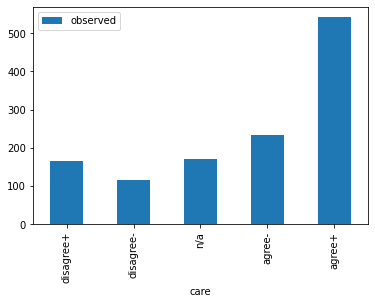

In [22]:
# a - graph it
df.plot.bar(x='care', y='observed')

In [23]:
# b
# Ho: p_hati = p_hatj
# Ha: p_hati <> p_hatj

chi_sq_calc = sum( ( (df.observed.values - df.expected.values)**2) / df.expected.values)
print(f"Test statistic: {round(chi_sq_calc, 4)}")

k = len(df)
df_k = k - 1
alpha = 0.05

crit_val = round(st.chi2.ppf(1 - alpha, df_k), 4)
print(f"Critical value: {crit_val}")

claim = "that the proportions are not equally dispersed over the five possible responses"

if chi_sq_calc > crit_val:
    print(f"At alpha = {alpha}, there is sufficient evidence to state {claim}")
else:
    print(f"At alpha = {alpha}, there is not sufficient evidence to state {claim}")

Test statistic: 474.7144
Critical value: 9.4877
At alpha = 0.05, there is sufficient evidence to state that the proportions are not equally dispersed over the five possible responses


In [24]:
# c
# Based on our answers in part A and part B, we can conclude that caregivers have a more positive attitude toward life
# given they are caring for an Alzheimer's patient that is their parent or spouse. 

#### Tests for independence and homogeneity

### 10.40

In [25]:
d = {
    "University": ["Most desireable", 'Desireable', 'Adequate', 'Undesireable'],
    'Outstanding': [21, 4, 13, 10],
    'Average': [20, 26, 7, 7],
    'Poor': [4, 36, 2, 6]
}

df = pd.DataFrame(d)
df

,University,Outstanding,Average,Poor
0,Most desireable,21,20,4
1,Desireable,4,26,36
2,Adequate,13,7,2
3,Undesireable,10,7,6


In [26]:
# transpose to get row data until I learn how to do this better
df_t = df.transpose()
new_h = df_t.iloc[0]
df_t = df_t[1:]
df_t.columns = new_h
df_t

University,Most desireable,Desireable,Adequate,Undesireable
Outstanding,21,4,13,10
Average,20,26,7,7
Poor,4,36,2,6


In [27]:
# a - Our population of interest are ranked universities for hiring engineering graduates

In [28]:
# b - perform test for independence
# get column sums
col_sums = df.sum().iloc[1:]
col_sums

Outstanding    48
Average        60
Poor           48
dtype: object

In [29]:
# get row sums
row_sums = df_t.sum()
row_sums

University
Most desireable    45
Desireable         66
Adequate           22
Undesireable       23
dtype: object

In [30]:
# get total sum
total_sum = sum(col_sums)
total_sum

156

In [31]:
# establish estimate variables
vals = []

for row in row_sums:
    n_row = []
    for col in col_sums:
        n_row.append((col * row) / total_sum)
    vals.append(n_row)

# vals

# prep expected df for mathematics 
df_new = pd.DataFrame(vals)
df_new.columns = df.columns[1:]
df_new["University"] = df.University.values
df_new.set_index("University", inplace=True)

# prep observered df for mathematics
df.set_index("University", inplace=True)

# show expected values
df_new

,Outstanding,Average,Poor
University,,,
Most desireable,13.846154,17.307692,13.846154
Desireable,20.307692,25.384615,20.307692
Adequate,6.769231,8.461538,6.769231
Undesireable,7.076923,8.846154,7.076923


In [32]:
chi_table = ((df.values - df_new.values)**2) / df_new

chi_sq = sum(sum(chi_table.values))
print(f"Chi-squared: {chi_sq}")

Chi-squared: 47.45727931488801


In [33]:
num_cols = len(df.columns[1:])
num_rows = len(df)

alpha = 0.05

deg_free = (num_rows - 1) * (num_cols - 1)
print(f"Degrees of freedom: {deg_free}")

crit_val = round(st.chi2.ppf(1 - alpha, deg_free), 4)
print(f"Critical value: {crit_val}")

Degrees of freedom: 3
Critical value: 7.8147


In [34]:
# d - There is sufficient evidence to conclude that there is an association between University Type and Performance

df_new = num_rows - 2

p_val = st.chi2.cdf(chi_sq, alpha)
print(f"P-value: {round(1 - p_val, 14)}")

# At a p-value so low, this proves we can conclude there is an association. 

P-value: 6e-14
